In [ ]:
import tensorflow as tf
import os
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np


In [ ]:
from google.colab import files
from google.colab import drive

df = pd.read_csv('/content/1_target_ts (1).csv')
df

,item,org,date,quantity
0,3959294,1617388,2014-03-01,6375
1,3959294,1619228,2014-03-02,2932
2,3959294,40022636,2014-03-03,2641
3,3959294,42023714,2014-03-04,8910
4,3959313,1617388,2014-03-05,1815
...,...,...,...,...
9486,140535880,42023714,2021-02-01,1271
9487,149440644,1617388,2021-02-01,1816
9488,149440644,1619228,2021-02-01,1185
9489,149440644,40022636,2021-02-01,499


In [ ]:
target_col = df['quantity']
target_col
df['date']=pd.to_datetime(df['date'],infer_datetime_format=True)
df['date'] = pd.to_datetime(df['date'], format="%Y-%m-%d")
df['date'] = df['date'].astype(str)
df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].map(pd.Timestamp.timestamp)
df['date'].dtype

#pd.to_datetime(['date']).astype(int) / 10**9


<ipython-input-5-6ac680bc9023>:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['date']=pd.to_datetime(df['date'],infer_datetime_format=True)


dtype('float64')

In [ ]:
df

,item,org,date,quantity
0,3959294,1617388,1.393632e+09,6375
1,3959294,1619228,1.393718e+09,2932
2,3959294,40022636,1.393805e+09,2641
3,3959294,42023714,1.393891e+09,8910
4,3959313,1617388,1.393978e+09,1815
...,...,...,...,...
9486,140535880,42023714,1.612138e+09,1271
9487,149440644,1617388,1.612138e+09,1816
9488,149440644,1619228,1.612138e+09,1185
9489,149440644,40022636,1.612138e+09,499


array([<Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>], dtype=object)

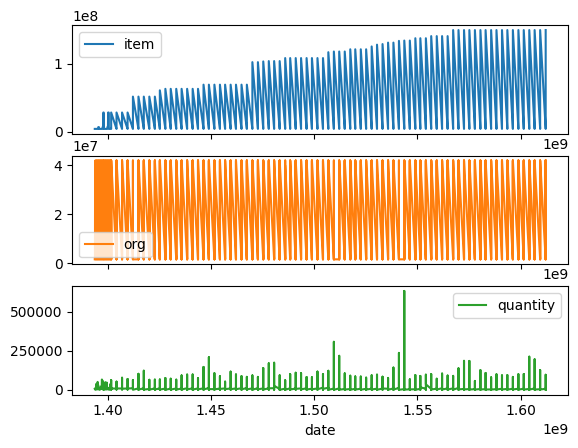

In [ ]:
df.set_index('date')[['item','org','quantity']].plot(subplots=True)

In [ ]:
from sklearn.preprocessing import minmax_scale
df

,item,org,date,quantity
0,3959294,1617388,1.393632e+09,6375
1,3959294,1619228,1.393718e+09,2932
2,3959294,40022636,1.393805e+09,2641
3,3959294,42023714,1.393891e+09,8910
4,3959313,1617388,1.393978e+09,1815
...,...,...,...,...
9486,140535880,42023714,1.612138e+09,1271
9487,149440644,1617388,1.612138e+09,1816
9488,149440644,1619228,1.612138e+09,1185
9489,149440644,40022636,1.612138e+09,499


In [ ]:
df_input=df[['date','quantity']]
df_input

,date,quantity
0,1.393632e+09,6375
1,1.393718e+09,2932
2,1.393805e+09,2641
3,1.393891e+09,8910
4,1.393978e+09,1815
...,...,...
9486,1.612138e+09,1271
9487,1.612138e+09,1816
9488,1.612138e+09,1185
9489,1.612138e+09,499


In [ ]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_input)
scaled_data

array([[0.00000000e+00, 1.00772670e-02],
       [3.95413207e-04, 4.63475242e-03],
       [7.90826414e-04, 4.17475483e-03],
       ...,
       [1.00000000e+00, 1.87318609e-03],
       [1.00000000e+00, 7.88793131e-04],
       [1.00000000e+00, 1.53016383e-03]])

In [ ]:
df.iloc[3001]

item        3.959313e+06
org         1.619228e+06
date        1.522541e+09
quantity    1.845000e+03
Name: 3001, dtype: float64

In [ ]:
scaled_data

array([[0.00000000e+00, 1.00772670e-02],
       [3.95413207e-04, 4.63475242e-03],
       [7.90826414e-04, 4.17475483e-03],
       ...,
       [1.00000000e+00, 1.87318609e-03],
       [1.00000000e+00, 7.88793131e-04],
       [1.00000000e+00, 1.53016383e-03]])

In [ ]:
features = scaled_data
target = scaled_data[:,1:]
target

array([[0.01007727],
       [0.00463475],
       [0.00417475],
       ...,
       [0.00187319],
       [0.00078879],
       [0.00153016]])

In [ ]:
target

array([[0.01007727],
       [0.00463475],
       [0.00417475],
       ...,
       [0.00187319],
       [0.00078879],
       [0.00153016]])

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(features,target,test_size=0.2, random_state=42, shuffle = False)

In [ ]:
X_train, X_valid, y_train, y_valid=train_test_split(X_train,y_train,test_size=0.25, random_state=42, shuffle = False)

In [ ]:
X_train.shape, X_valid.shape,X_test.shape, y_train.shape,y_valid.shape,y_test.shape

((5694, 2), (1898, 2), (1899, 2), (5694, 1), (1898, 1), (1899, 1))

In [ ]:
''' X_train = np.asarray(X_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)
X_test = np.asarray(X_test).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)
 '''

' X_train = np.asarray(X_train).astype(np.float32)\ny_train = np.asarray(y_train).astype(np.float32)\nX_test = np.asarray(X_test).astype(np.float32)\ny_test = np.asarray(y_test).astype(np.float32)\n '

In [ ]:
win_length=10

batch_size=64
num_features=2 # tf.keras.utils.timeseries_dataset_from_array
train_generator=tf.keras.utils.timeseries_dataset_from_array(X_train,y_train,sequence_length=win_length, sampling_rate=1,batch_size=batch_size)
valid_generator=tf.keras.utils.timeseries_dataset_from_array(X_valid,y_valid,sequence_length=win_length, sampling_rate=1,batch_size=batch_size)
test_generator=tf.keras.utils.timeseries_dataset_from_array(X_test,y_test,sequence_length=win_length, sampling_rate=1,batch_size=batch_size)

In [ ]:
X_test, y_test

(array([[8.90865955e-01, 1.33731260e-03],
        [8.90865955e-01, 6.51268076e-04],
        [8.90865955e-01, 9.05768465e-04],
        ...,
        [1.00000000e+00, 1.87318609e-03],
        [1.00000000e+00, 7.88793131e-04],
        [1.00000000e+00, 1.53016383e-03]]),
 array([[0.00133731],
        [0.00065127],
        [0.00090577],
        ...,
        [0.00187319],
        [0.00078879],
        [0.00153016]]))

In [ ]:
y_test.shape

(1899, 1)

In [ ]:
len(test_generator)

30

In [ ]:
type(test_generator)

tensorflow.python.data.ops.batch_op._BatchDataset

In [ ]:
'''
model=tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(128,input_shape= (win_length,num_features), return_sequences=True))
#model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.LSTM(64, return_sequences=True))
#model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.Dropout(0.4)) #uncomm
model.add(tf.keras.layers.LSTM(32, return_sequences=False)) #32
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(1))

 '''




'\nmodel=tf.keras.Sequential()\nmodel.add(tf.keras.layers.LSTM(128,input_shape= (win_length,num_features), return_sequences=True))\n#model.add(tf.keras.layers.LeakyReLU(alpha=0.5))\nmodel.add(tf.keras.layers.LSTM(64, return_sequences=True))\n#model.add(tf.keras.layers.LeakyReLU(alpha=0.5))\nmodel.add(tf.keras.layers.Dropout(0.4)) #uncomm\nmodel.add(tf.keras.layers.LSTM(32, return_sequences=False)) #32\nmodel.add(tf.keras.layers.Dropout(0.4))\nmodel.add(tf.keras.layers.Dense(1))\n\n '

In [ ]:

''' model=tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(64,input_shape= (win_length,num_features), return_sequences=False))
model.add(tf.keras.layers.Dense(16))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(4))

model.add(tf.keras.layers.Dense(1)) '''
#model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
#model.add(tf.keras.layers.LSTM(64, return_sequences=True))
#model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
#model.add(tf.keras.layers.Dropout(0.4)) #uncomm
#model.add(tf.keras.layers.LSTM(32, return_sequences=False)) #32
#model.add(tf.keras.layers.Dropout(0.4))
#model.add(tf.keras.layers.Dense(1))






' model=tf.keras.Sequential()\nmodel.add(tf.keras.layers.LSTM(64,input_shape= (win_length,num_features), return_sequences=False))\nmodel.add(tf.keras.layers.Dense(16))\nmodel.add(tf.keras.layers.Dropout(0.4))\nmodel.add(tf.keras.layers.Dense(4))\n\nmodel.add(tf.keras.layers.Dense(1)) '

In [ ]:
''' model=tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(64,input_shape= (win_length,num_features), return_sequences=False))
model.add(tf.keras.layers.Dense(16))
model.add(tf.keras.layers.Dense(8, 'linear'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(4))
model.add(tf.keras.layers.Dense(1)) '''

" model=tf.keras.Sequential()\nmodel.add(tf.keras.layers.LSTM(64,input_shape= (win_length,num_features), return_sequences=False))\nmodel.add(tf.keras.layers.Dense(16))\nmodel.add(tf.keras.layers.Dense(8, 'linear'))\nmodel.add(tf.keras.layers.Dropout(0.4))\nmodel.add(tf.keras.layers.Dense(4))\nmodel.add(tf.keras.layers.Dense(1)) "

In [ ]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(128,input_shape= (win_length,num_features), return_sequences=True))
#model.add(tf.keras.layers.LeakyReLU(alpha=0.2))
model.add(tf.keras.layers.LSTM(64,activation="tanh",input_shape= (win_length,num_features), return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.LSTM(64, return_sequences=False))

#model.add(tf.keras.layers.LSTM(16, return_sequences=True))
#model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.Dropout(0.3))
#model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(1))



In [ ]:
len(train_generator)


89

In [ ]:
 model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 128)           67072     
                                                                 
 lstm_1 (LSTM)               (None, 10, 64)            49408     
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 10, 64)            0         
                                                                 
 lstm_2 (LSTM)               (None, 64)                33024     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 149569 (584.25 KB)
Trainable params: 14956

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=2,mode='min')
model.compile( loss = tf.losses.MeanSquaredError(),optimizer=tf.optimizers.Adam(learning_rate=0.0001), metrics = [tf.metrics.MeanAbsoluteError()])

history= model.fit(train_generator, epochs = 50, validation_data =valid_generator, shuffle =False, callbacks = [early_stopping])

Epoch 1/50
89/89 [==============================] - 13s 69ms/step - loss: 0.0010 - mean_absolute_error: 0.0148 - val_loss: 4.9771e-04 - val_mean_absolute_error: 0.0101
Epoch 2/50
89/89 [==============================] - 6s 70ms/step - loss: 9.4158e-04 - mean_absolute_error: 0.0136 - val_loss: 4.4875e-04 - val_mean_absolute_error: 0.0068
Epoch 3/50
89/89 [==============================] - 5s 53ms/step - loss: 8.1751e-04 - mean_absolute_error: 0.0124 - val_loss: 3.4091e-04 - val_mean_absolute_error: 0.0073
Epoch 4/50
89/89 [==============================] - 6s 71ms/step - loss: 7.2119e-04 - mean_absolute_error: 0.0117 - val_loss: 3.0144e-04 - val_mean_absolute_error: 0.0062
Epoch 5/50
89/89 [==============================] - 5s 52ms/step - loss: 6.3267e-04 - mean_absolute_error: 0.0103 - val_loss: 2.8425e-04 - val_mean_absolute_error: 0.0066
Epoch 6/50
89/89 [==============================] - 5s 61ms/step - loss: 5.9415e-04 - mean_absolute_error: 0.0099 - val_loss: 2.6057e-04 - val_mean_

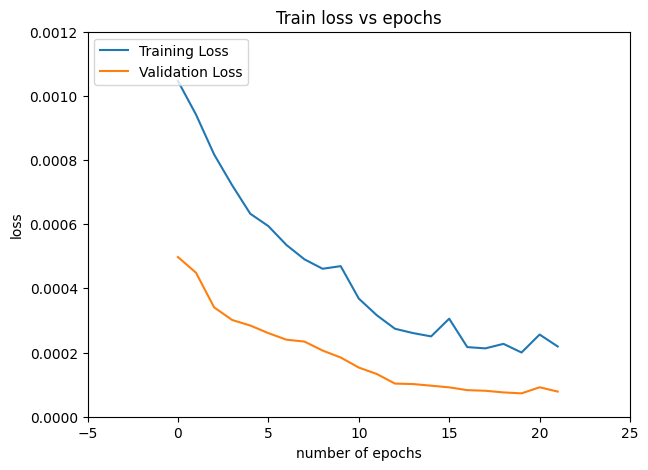

In [ ]:

train_loss = history.history['loss']
val_loss = history.history['val_loss']
rnn=len(val_loss)
rn=range(rnn)
train_loss

plt.figure(1,figsize=(7,5))
plt.plot(rn, train_loss)
plt.plot(rn, val_loss)
plt.xlabel('number of epochs')
plt.ylabel('loss')
plt.title('Train loss vs epochs')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper left')
plt.style.use(['classic'])


In [ ]:
len(test_generator)

30

In [ ]:
model.evaluate(test_generator, verbose = 0)

[7.837121665943414e-05, 0.0030552074313163757]

In [ ]:
predictions = model.predict(test_generator)

30/30 [==============================] - 2s 22ms/step


In [ ]:
len(predictions)

1890

In [ ]:
predictions

array([[0.00070221],
       [0.00075699],
       [0.00179453],
       ...,
       [0.0061884 ],
       [0.00385619],
       [0.00333952]], dtype=float32)

In [ ]:
y_test

array([[0.00133731],
       [0.00065127],
       [0.00090577],
       ...,
       [0.00187319],
       [0.00078879],
       [0.00153016]])

In [ ]:
y_test[win_length-1:,:].shape

(1890, 1)

In [ ]:
predictions.flatten().shape

(1890,)

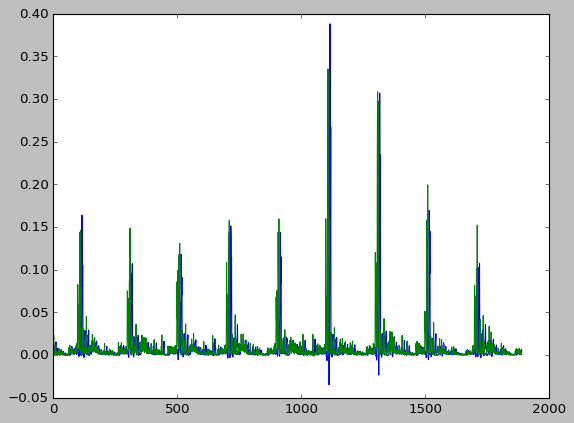

In [ ]:
df1=pd.DataFrame(data={'Predictions':predictions.flatten(), 'Actuals':y_test[win_length-1:,:].flatten()})
plt.plot(df1['Predictions'][0:len(predictions)-1])
plt.plot(df1['Actuals'][0:len(predictions)-1])

In [ ]:
X_test[win_length-1:,0:2].shape

(1890, 2)

In [ ]:
predictions.shape

(1890, 1)

In [ ]:
df_pred=pd.concat([ pd.DataFrame(X_test[win_length:,0:1]),pd.DataFrame(predictions)] ,axis=1)

In [ ]:
rev_trans = scaler.inverse_transform(df_pred)

In [ ]:
rev_trans

array([[1.58829120e+09, 4.44226033e+02],
       [1.58829120e+09, 4.78881062e+02],
       [1.58829120e+09, 1.13523832e+03],
       ...,
       [1.61213760e+09, 3.91485380e+03],
       [1.61213760e+09, 2.43947296e+03],
       [           nan, 2.11262025e+03]])

In [ ]:
df_final = df_input [predictions.shape[0]*-1:]

In [ ]:
df_final

,date,quantity
7601,1.588291e+09,1749
7602,1.588291e+09,14842
7603,1.588291e+09,1180
7604,1.588291e+09,563
7605,1.588291e+09,376
...,...,...
9486,1.612138e+09,1271
9487,1.612138e+09,1816
9488,1.612138e+09,1185
9489,1.612138e+09,499


In [ ]:
df_final.count()

date        1890
quantity    1890
dtype: int64

In [ ]:
df_final['quantity_pred']=rev_trans[:,1:]

In [ ]:
df_final

,date,quantity,quantity_pred
7601,1.588291e+09,1749,444.226033
7602,1.588291e+09,14842,478.881062
7603,1.588291e+09,1180,1135.238316
7604,1.588291e+09,563,2222.532379
7605,1.588291e+09,376,577.564867
...,...,...,...
9486,1.612138e+09,1271,1663.764554
9487,1.612138e+09,1816,3203.271381
9488,1.612138e+09,1185,3914.853801
9489,1.612138e+09,499,2439.472961


<Axes: >

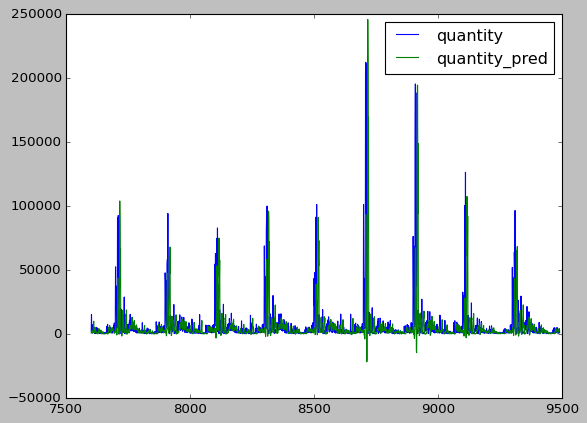

In [ ]:
df_final[['quantity','quantity_pred']].plot()

In [ ]:
print(df_final['quantity'].dtype)
print(df_final['quantity_pred'].dtype)

int64
float64


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(df_final['quantity'],df_final['quantity_pred'])*100

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [ ]:
#df_part= df['item'][:,7601:]
df_part = df.iloc[7601:,0]

In [ ]:
df_part

In [ ]:
df_concat = pd.concat([df_part, df_final], axis=1)
df_concat

In [ ]:
import matplotlib.pyplot as plt


predicted_sales = df_concat['quantity_pred']
# Combine predicted sales with original dataframe
#df_final['predicted_sales'] = predicted_sales

# Aggregate predicted and actual sales by date and item
total_sales_by_date = df_concat.groupby(['date', 'item']).agg({'quantity_pred': 'sum', 'quantity': 'sum'}).reset_index()

# Plot total sales for each item
for item in total_sales_by_date['item'].unique():
    item_data = total_sales_by_date[total_sales_by_date['item'] == item]
    item_data_sorted = item_data.sort_values(by='date')  # Sort by date

    plt.figure(figsize=(12, 6))

    plt.plot(item_data_sorted['date'], item_data_sorted['quantity_pred'], label='Predicted Sales')
    plt.plot(item_data_sorted['date'], item_data_sorted['quantity'], label='Actual Sales')

    plt.title(f'Sales for Item {item}')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend()
    plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
mae = mean_absolute_error(df_final['quantity_pred'], df_final['quantity'])
mse = mean_squared_error(df_final['quantity_pred'], df_final['quantity'])
mae, mse